<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [3]</a>'.</span>

To run this example locally, [install Ploomber](https://docs.ploomber.io/en/latest/get-started/quick-start.html) and execute: `ploomber examples -n guides/monitoring`

[![binder-logo](https://raw.githubusercontent.com/ploomber/projects/master/_static/open-in-jupyterlab.svg)](https://binder.ploomber.io/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Fguides/monitoring%252FREADME.ipynb%26branch%3Dmaster)

Found an issue? [Let us know.](https://github.com/ploomber/projects/issues/new?title=guides/monitoring%20issue)

Have questions? [Ask us anything on Slack.](https://ploomber.io/community/)


## Get a sample pipeline

<!-- start description -->
To show the capabilities we'll run our pipeline monitoring through a pre-built Ploomber template: ml-basic.
<!-- end description -->

In [1]:
%%bash
ploomber plot

Loading pipeline...
Plot saved at: pipeline.png


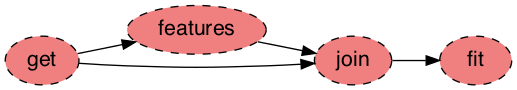

In [2]:
# If using jupyter, you can show the plot with this code:
from IPython.display import Image
Image(filename='pipeline.png')
# otherwise open the pipeline.png file directly

# NOTE: ploomber plot will generate a pipeline.html (not .png) file if
# pygraphviz is missing. In such case, open the file to view the pipeline plot

Let's take a look at the `pipeline.yaml`:

```yaml
# Content of pipeline.yaml
tasks:
  - source: tasks.get
    product: output/get.parquet

  - source: tasks.features
    product: output/features.parquet

  - source: tasks.join
    product: output/join.parquet

  - source: fit.py
    name: fit
    product:
        nb: output/nb.ipynb
        model: output/model.pickle

```

## Setup your API key

Go to the cloud and setup your key, add your email address:

https://main.d3mpv0f3dqco4e.amplifyapp.com/register

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [3]:
%%bash
ploomber cloud set-key $YOUR_API_KEY

Usage: ploomber cloud set-key [OPTIONS] USER_KEY
Try 'ploomber cloud set-key --help' for help.

Error: Missing argument 'USER_KEY'.


CalledProcessError: Command 'b'ploomber cloud set-key $YOUR_API_KEY\n'' returned non-zero exit status 2.

In [ ]:
%%bash
ploomber cloud get-key

## Run your pipeline
We can get all of our pipeline execution history by running the command below, we can check out if we have anything that was errored out

In [ ]:
%%bash
ploomber cloud get-pipelines

now let's run the sample ml-basic pipeline and see how it's tracked

In [ ]:
%%sh --no-raise-error
ploomber build

Seeing how a successful pipeline looks like. You can also view the alerting mechanism - check out your email report!

In [ ]:
%%bash
ploomber cloud get-pipelines latest

![working-monitoring](https://ploomber.io/images/doc/monitoring-pipeline.png)

In [ ]:
from pathlib import Path

path = Path('fit.py')
clean = path.read_text()

# add a print statement at the end of 3-clean.py
path.write_text(clean + """
raise ValueError("This is a sample error in the model fit")
""")

In [ ]:
%%sh --no-raise-error
ploomber build

### Check your email
You should have a similar email stating a pipeline errored out and the error trace.

![errored-pip-monitoring](https://ploomber.io/images/doc/monitoring-pipeline.png)

You can also get all of the active pipelines, we'll see only ones that didn't finished yet.

In [ ]:
%%bash
ploomber cloud get-pipelines active

We can also delete errored pipelines if we'd like to for instance we can run the command below to delete the ml pipeline.


In [ ]:
%%sh --no-raise-error
ploomber cloud delete-pipeline 9448f7ee-cc90-4e8a-8539-98e2ed0b4061

# Conclusion
This short guide allows you to track your pipelines, it's especially relevant when running parallel/long executions and you want to be notified once your workflow has finished.

For more information you can check out the official guide: https://docs.ploomber.io/en/latest/cloud/index.html